In [268]:
# Library imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [269]:
# Data imports
current_data_path = os.getcwd()
base_data_path =os.path.dirname(current_data_path)
data_path = base_data_path + "/diabetesdata/"
base_filename = "diabetes.csv"
filename = os.path.join(data_path, base_filename)

In [270]:
df = pd.read_csv(filename)

In [271]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* The minimum values for Glucose, BloodPressure, SkinThickenss, Insulin and BMI is 0 which is very odd
* These values need to imputed. Before imputation lets replace 0 values to NAN

In [340]:
import numpy as np
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

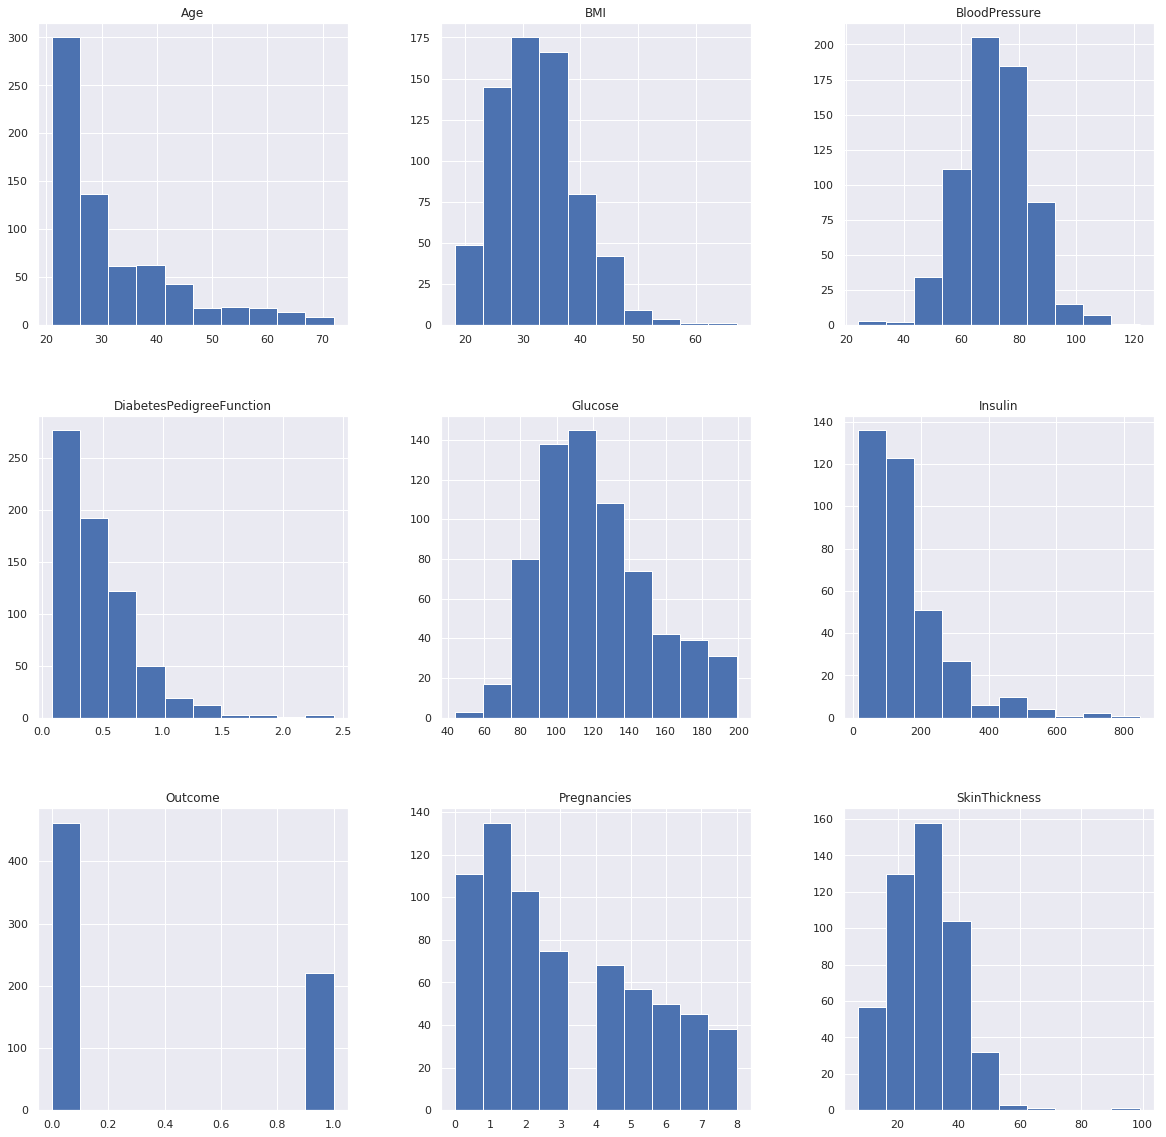

In [360]:
p = df.hist(figsize = (20,20))

* BMI, Insulin, Skin Thickness, DiabetesPedigree are postively skewed 
* BloodPressure slightly negativley skwed

0    462
1    220
Name: Outcome, dtype: int64


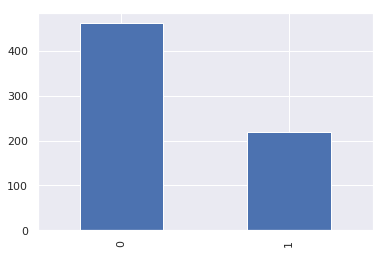

In [364]:

color_wheel = {1: "#0392cf", 
               2: "#fffff"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

* Check the class balance for target variable
* About over 400+ people were classified as not having diabetes
* About over 200+ people were classified as having diabetes
* The target variable is imbalanced and biased towards non-daibetic patients


### Helper functions for introducing new features

In [345]:
#Function to map if the patient is pregnant or not 
def pregnancy_check(x):
    if x <= 0 :
        return 'False'
    elif x >= 0 :
        return 'True'
    
#Function to bin the age      
def age_check(x):
    if (x >=21) and (x<=30):
        return 'Young_Adults'
    elif (x > 30) and (x<=60):
        return  'Mature_Adults'
    elif (x >=60) and  (x < 81):
        return 'Older_Adults'

In [346]:
df["Pregnancy_Values"] = df["Pregnancies"].apply(pregnancy_check)
df["Age_check"] = df["Age"].apply(age_check)

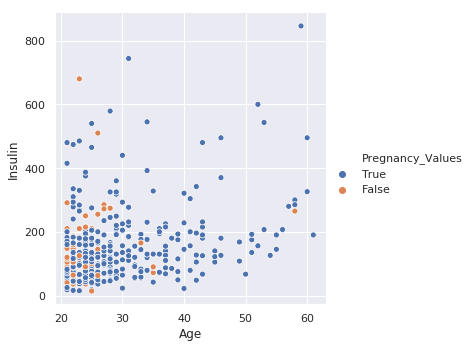

In [347]:
sns.relplot(x="Age", y="Insulin", hue="Pregnancy_Values", data=df)

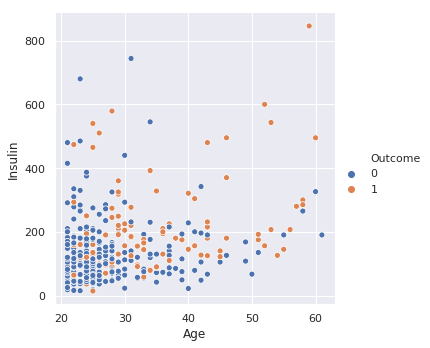

In [348]:
sns.relplot(x="Age", y="Insulin", hue='Outcome', data=df)

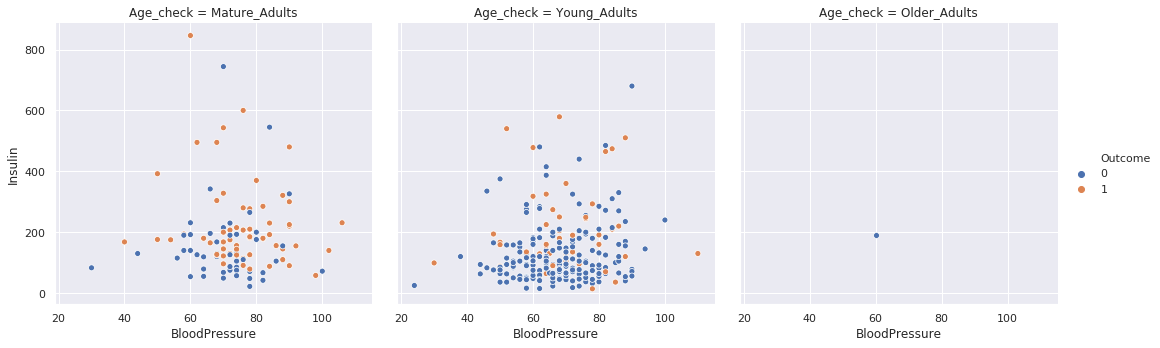

In [349]:
sns.relplot(x="BloodPressure", y="Insulin", hue="Outcome",
            col="Age_check", data=df);

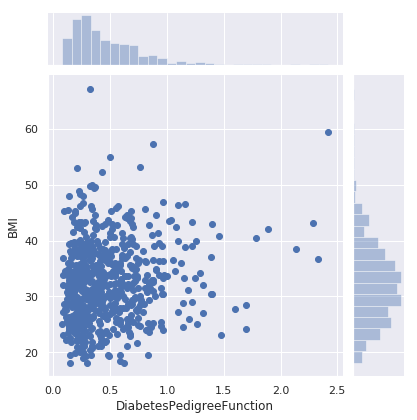

In [350]:
sns.jointplot(x="DiabetesPedigreeFunction", y="BMI", data=df);

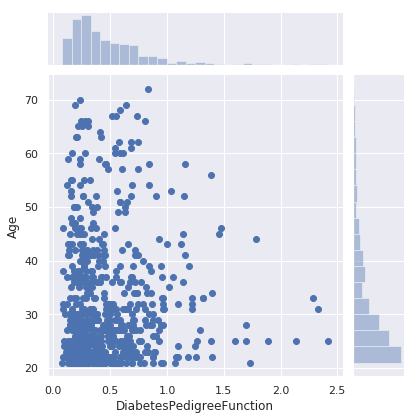

In [351]:
sns.jointplot(x="DiabetesPedigreeFunction", y="Age", data=df);

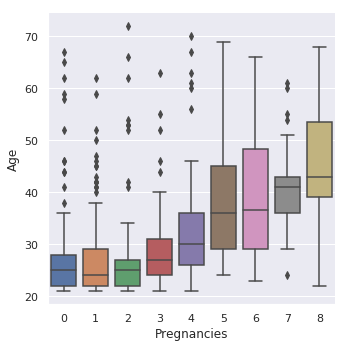

In [352]:
sns.catplot(x="Pregnancies", y="Age", kind="box", data=df)

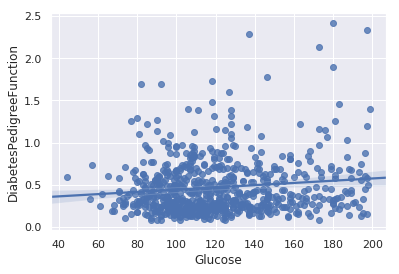

In [353]:
sns.regplot(x="Glucose", y="DiabetesPedigreeFunction", data=df)

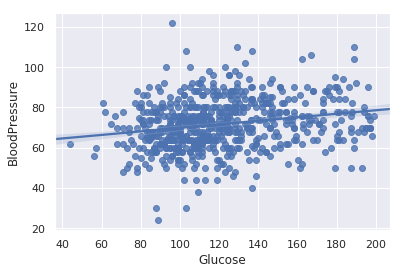

In [354]:
sns.regplot(x="Glucose", y="BloodPressure", data=df)

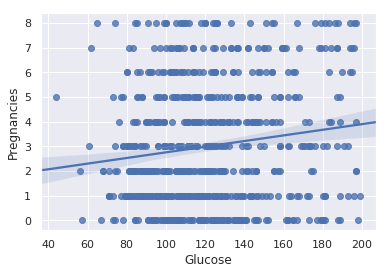

In [355]:
sns.regplot(x="Glucose", y="Pregnancies", data=df)

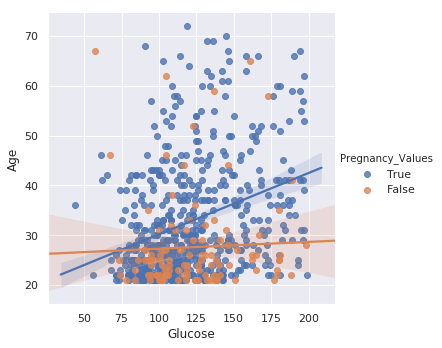

In [356]:
sns.lmplot(x="Glucose", y="Age", hue ='Pregnancy_Values', data=df)

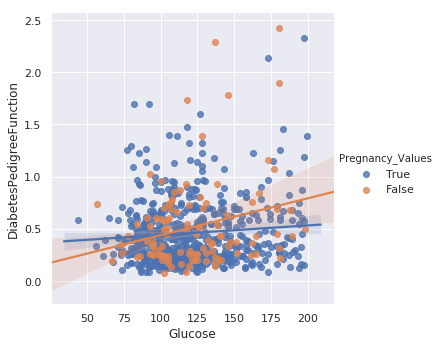

In [357]:
sns.lmplot(x="Glucose", y="DiabetesPedigreeFunction", hue ='Pregnancy_Values', data=df)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


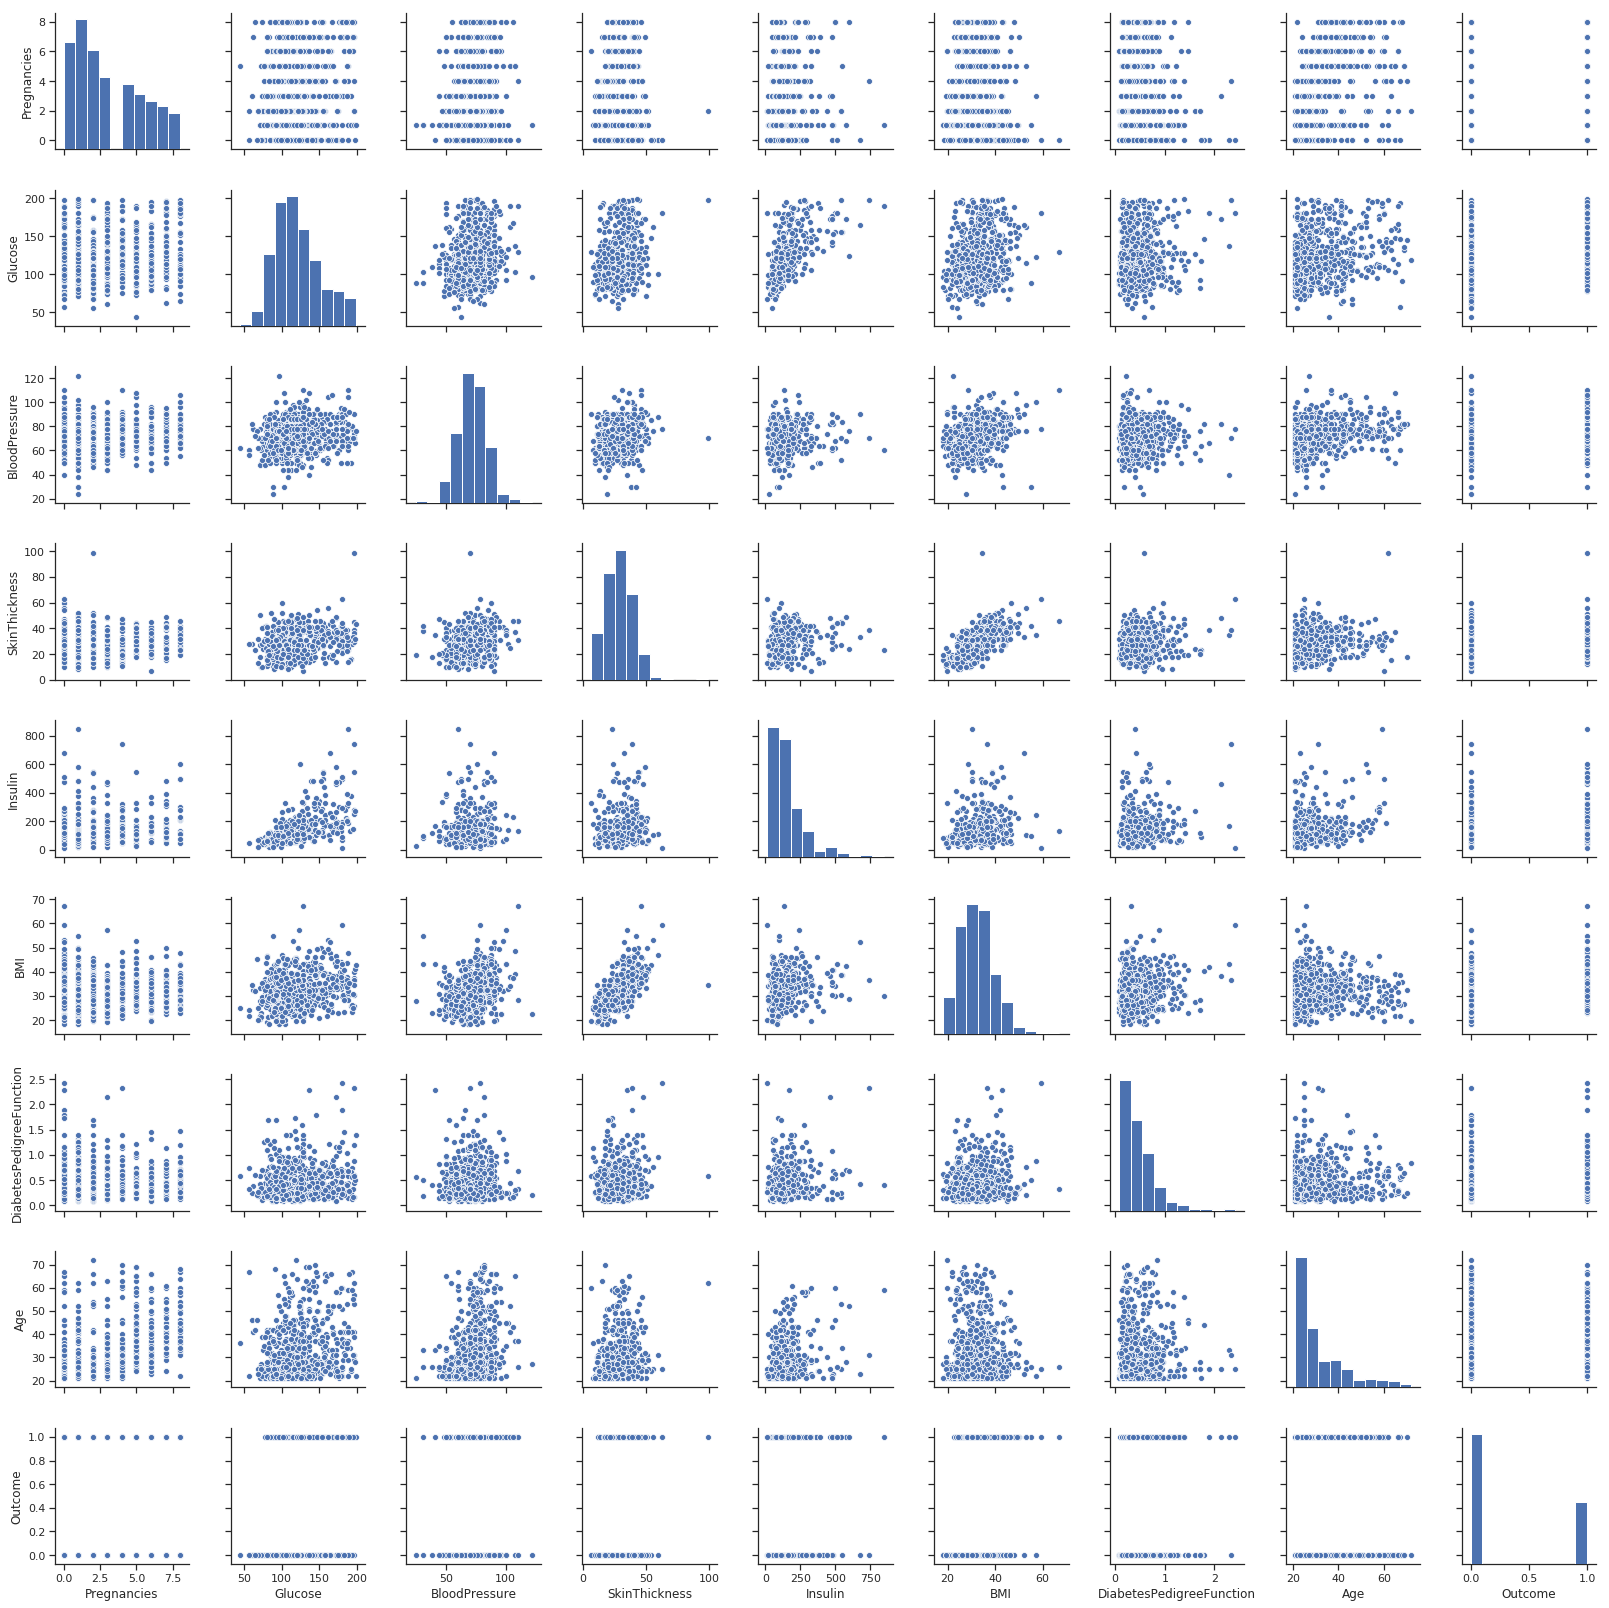

In [373]:
#Scatter matrix for uncleaned data to map relationship between two varaibles
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

* In General the data is affected by Outliers. We can confirm this with a box plot as indicated below
* Variable insulin has the highest outlier observation

## Pearson correlation coefficient

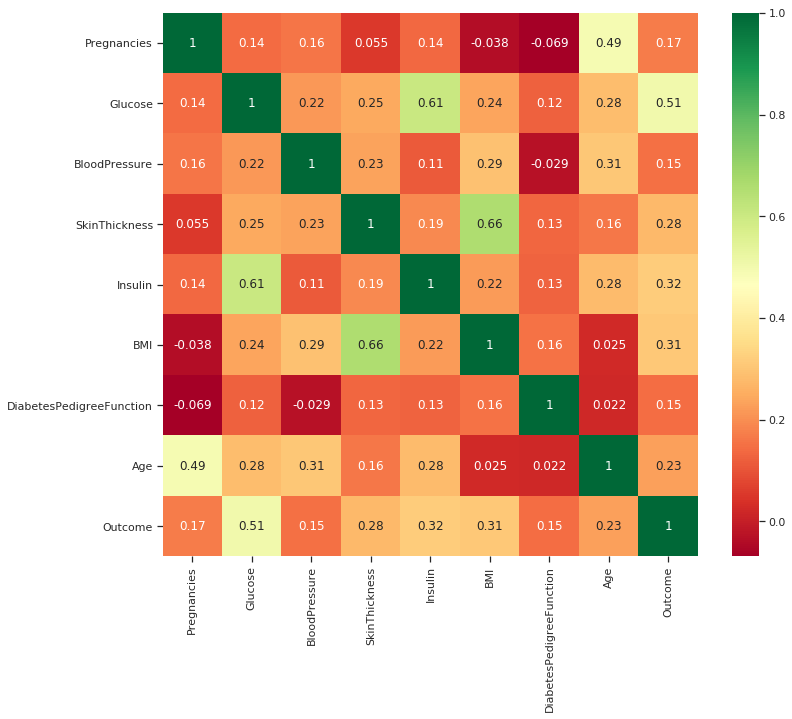

In [375]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

* The pearson corelation shows there is major positive corelation between 
  * Glucose and Insulin
  * Skin-Thickness and the BMI
  * Glucose and age
  * Glucose and outcome
  * Age and pregnancies
  

## Outlier Detection

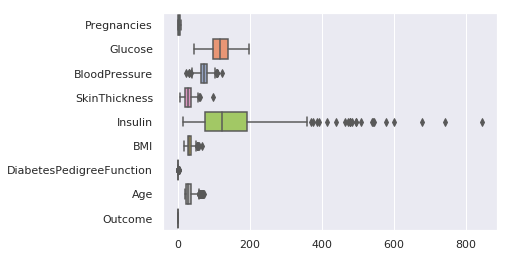

In [359]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

# Feature Engineering 

In [376]:
# Filter out pregnanices about 90 percentile to get rid of the outliers
df = df[df.Pregnancies < df.Pregnancies.quantile(.90)]

In [380]:
# Convert object data types to type category
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [381]:
df.shape, df.dtypes

((599, 11), Pregnancies                    int64
 Glucose                      float64
 BloodPressure                float64
 SkinThickness                float64
 Insulin                      float64
 BMI                          float64
 DiabetesPedigreeFunction     float64
 Age                            int64
 Outcome                        int64
 Pregnancy_Values            category
 Age_check                   category
 dtype: object)

# Split Data

In [306]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Modelling Pipeline

In [403]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define Numeric and categorical transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [404]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['Outcome'], axis=1).columns
categorical_features = df.select_dtypes(include=['category']).columns

#Fit the transformer to selected numerical and categorical features
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [405]:
categorical_features,numeric_features

(Index(['Pregnancy_Values', 'Age_check'], dtype='object'),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'],
       dtype='object'))

## Baseline model pipeline

* Wihout further hyperparameter tuning, or any parameter search the results suggest that Gradient Boosting has a better validation accuracy compared to other models

In [504]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
classifiers = [
    # KNeighborClassifier with number of neighbors set to 5
    KNeighborsClassifier(5),
    DecisionTreeClassifier(),
    RandomForestRegressor(random_state=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for calssifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', calssifier)])
    pipe.fit(X_train, y_train)   

    print(calssifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.724
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.693
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Method: Random Forest

In [487]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=100))])

# Hyperparameter optimisation
### A quick grid search for the estimator and depth hyper parameters for random forest gives the following results

In [491]:
param_grid = { 
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8]}
    
CV = GridSearchCV(rf, param_grid, n_jobs= 3)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'classifier__max_depth': 6, 'classifier__max_features': 'auto', 'classifier__n_estimators': 500}
0.7731277533039648


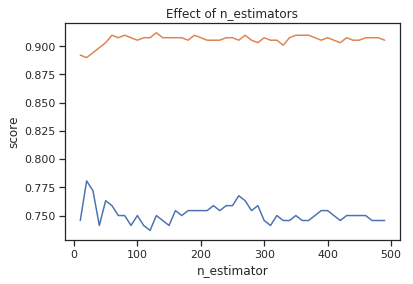

In [492]:
# Evaluate model performance for different estimators

estimators = np.arange(10, 500, 10)
train_scores = []
test_scores = []
for n in estimators:
    rf.set_params(classifier__n_estimators=n, classifier__max_depth=6)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, test_scores)  
plt.plot(estimators, train_scores)

In [493]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 91.18942731277532 % and k = [13]


In [494]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.0701754385965 % and k = [2]


## Model Metrics for Random Forest

In [497]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,130,24,154
1,34,40,74
All,164,64,228


Text(0.5, 12.5, 'Predicted label')

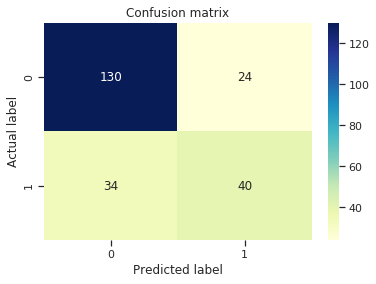

In [498]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


* The confusion matrix suggests that in total 130 labels where classifed as true positives in the test data where the outcome of the patient was not diabetic
* The confusion matrix suggests that in total 40 lables were classified as true positives where the outcome of the was diabetic 

In [499]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       154
           1       0.62      0.54      0.58        74

    accuracy                           0.75       228
   macro avg       0.71      0.69      0.70       228
weighted avg       0.74      0.75      0.74       228



# Evaluting the fitness of the Random forest model using ROC curve 

In [500]:
from sklearn.metrics import roc_curve
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

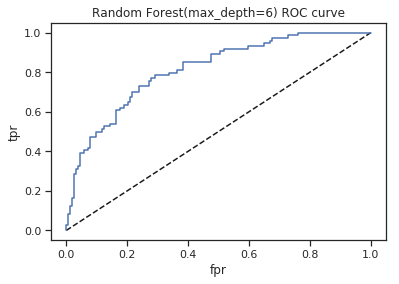

In [503]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest(max_depth=6) ROC curve')
plt.show()

In [502]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8121270621270621

# Gradient Boosting Model Without Fine Tuning

In [541]:
from sklearn.ensemble import GradientBoostingClassifier
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features= None, random_state=10)
gb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', baseline)])

In [549]:
feature_importance = gb.named_steps['classifier'].feature_importances_
feature_importance_new = list(filter(lambda a: a !=0 , feature_importance))
gb.fit(X_train,y_train)
predictors=list(X_train)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       154
           1       0.62      0.61      0.62        74

    accuracy                           0.75       228
   macro avg       0.72      0.72      0.72       228
weighted avg       0.75      0.75      0.75       228



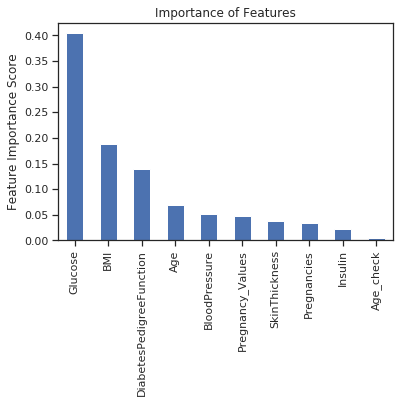

In [554]:
feat_imp = pd.Series(feature_importance_new, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

pred=gb.predict(X_test)
print(classification_report(y_test, pred))

* A simple GBM model seems to outperform a tuned random forest model. As demostrated by the classification report
* The Feature importance for GBM opens up more room to explore the space of feature engineering 